# Quantifying the World
## Satvik Ajmera
## Summer 2022

In [1]:
import pandas as pd
import numpy as np

Your case study is to build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. Once again, discuss variable importances as part of your submission.

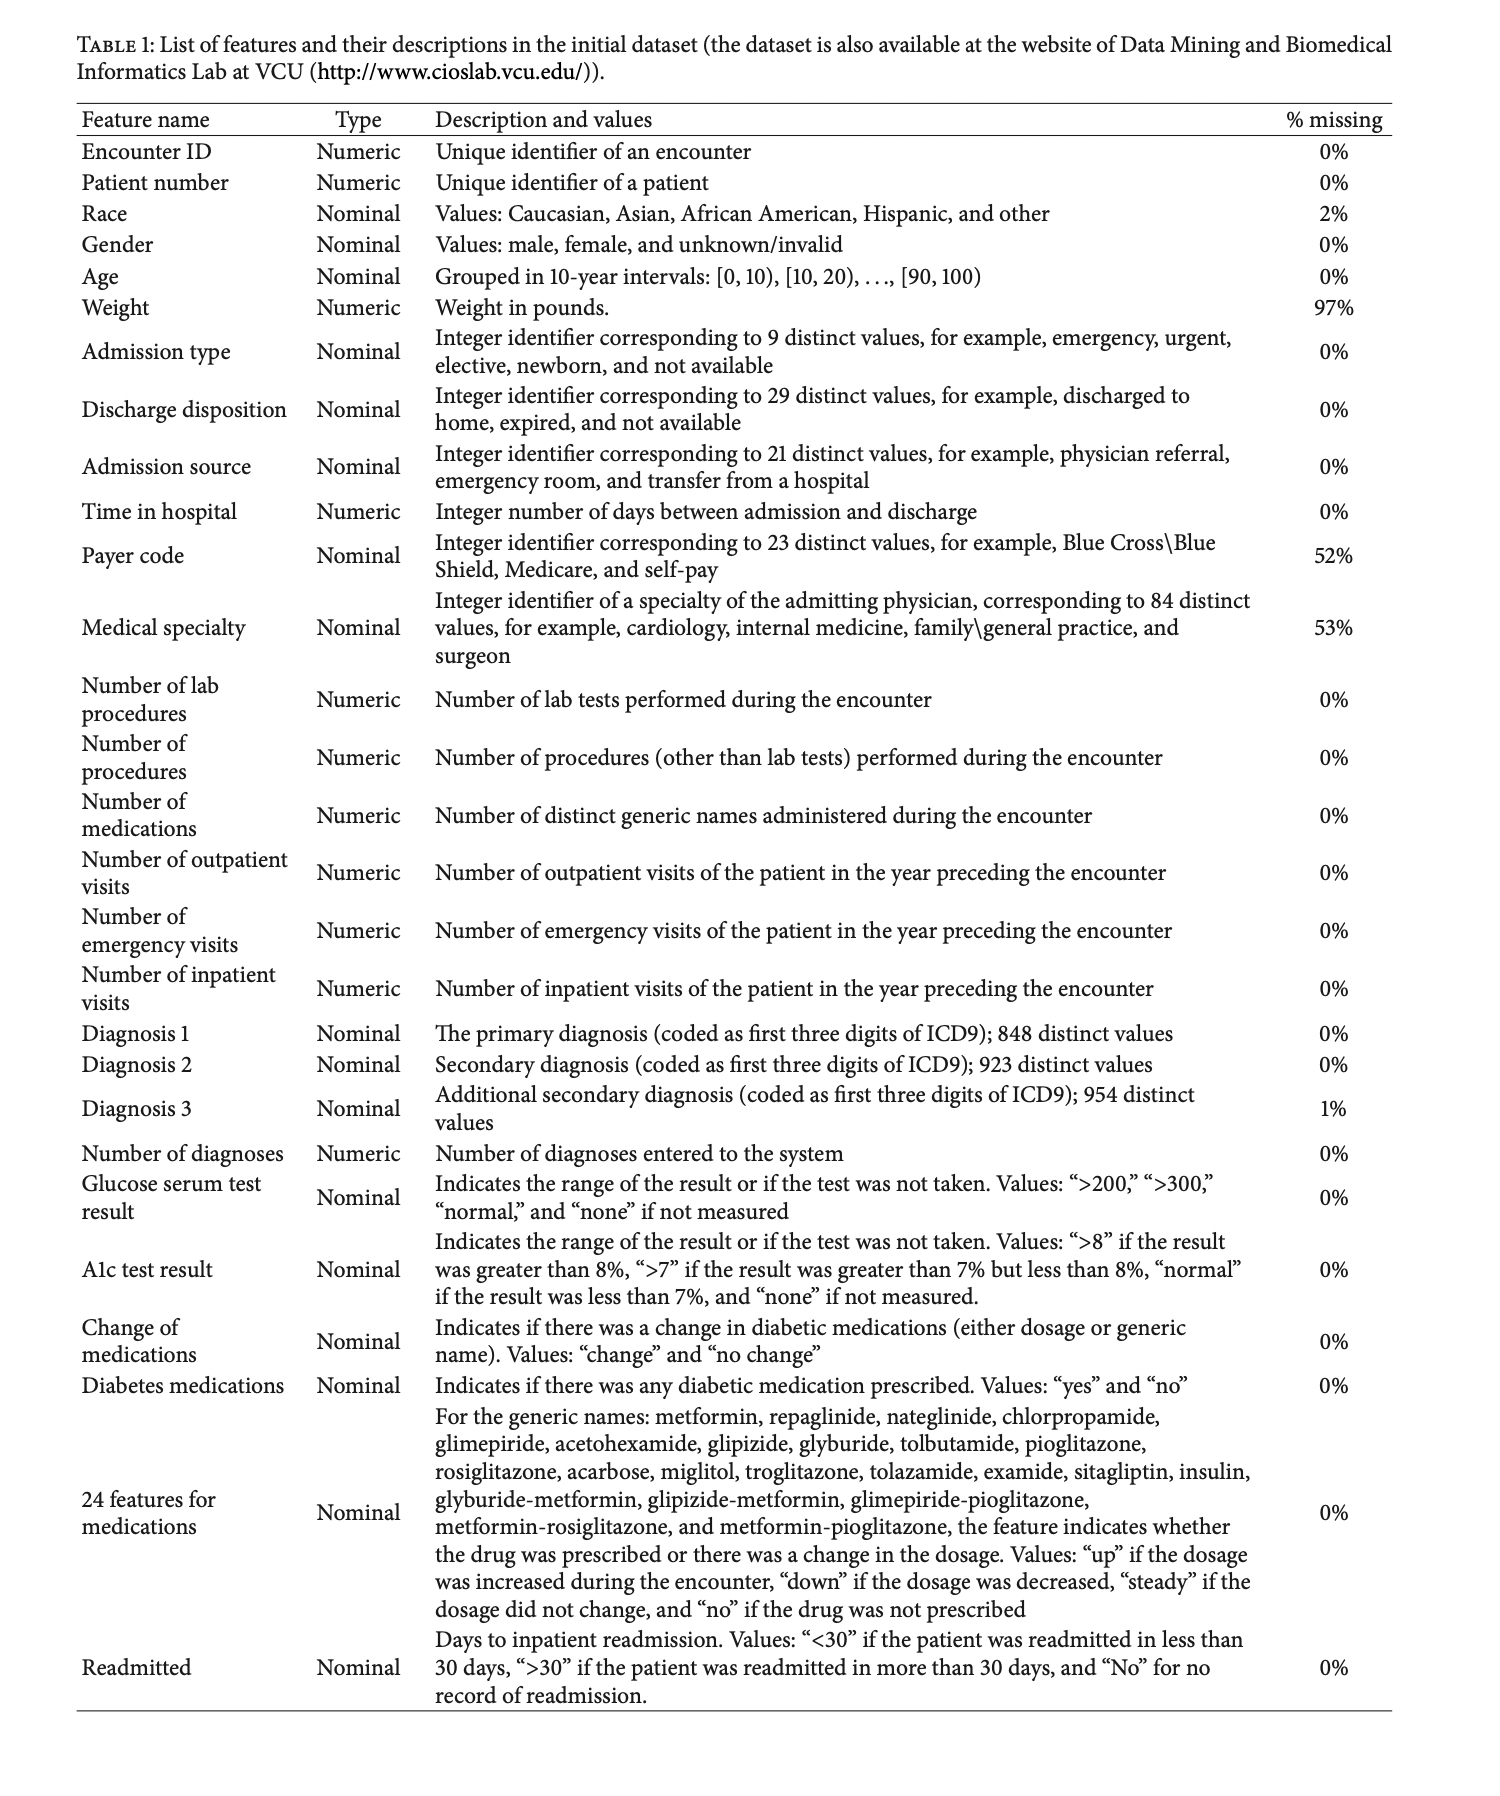

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
diabetes_df = pd.read_csv("diabetic_data.csv")

In [5]:
ids = pd.read_csv("IDs_mapping.csv")

In [25]:
ids

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [29]:
ids = ids.dropna(subset=["admission_type_id"])

In [30]:
ids

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
9,discharge_disposition_id,description
10,1,Discharged to home


In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
admission_type_id = ids[0:8]

In [8]:
admission_type_id.reset_index(inplace=True, drop=True)

In [35]:
admission_type_id["admission_type_id"] = admission_type_id["admission_type_id"].astype(int)

/var/folders/zl/4qqdwn7s6wv34lrr9sxt7tf40000gn/T/ipykernel_33318/3621137744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_type_id["admission_type_id"] = admission_type_id["admission_type_id"].astype(int)


In [10]:
discharge_disposition_id = ids[10:40]

In [11]:
discharge_disposition_id.columns = ["discharge_disposition_id","description"]

In [12]:
discharge_disposition_id.reset_index(inplace=True, drop=True)

In [32]:
discharge_disposition_id.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...


In [38]:
discharge_disposition_id["discharge_disposition_id"] = discharge_disposition_id["discharge_disposition_id"].astype(int)

/var/folders/zl/4qqdwn7s6wv34lrr9sxt7tf40000gn/T/ipykernel_33318/1993021309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharge_disposition_id["discharge_disposition_id"] = discharge_disposition_id["discharge_disposition_id"].astype(int)


In [14]:
admission_source_id = ids[42:]

In [15]:
admission_source_id.columns = ["admission_source_id", "description"]

In [16]:
admission_source_id.reset_index(inplace=True, drop=True)

In [39]:
admission_source_id["admission_source_id"] = admission_source_id["admission_source_id"].astype(int)

/var/folders/zl/4qqdwn7s6wv34lrr9sxt7tf40000gn/T/ipykernel_33318/1365254308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_source_id["admission_source_id"] = admission_source_id["admission_source_id"].astype(int)


In [44]:
df = diabetes_df.merge(admission_type_id, on= "admission_type_id", how = "left").merge(discharge_disposition_id, on= "discharge_disposition_id", how = "left").merge(admission_source_id, on= "admission_source_id", how = "left")

In [47]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description_x,description_y,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged/transferred to SNF,Emergency Room
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent,Discharged/transferred to SNF,Emergency Room


In [48]:
ids

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
9,discharge_disposition_id,description
10,1,Discharged to home


In [49]:
df_replaced = df.rename({'description_x': 'admission_type_id_x', 'description_y': 'discharge_disposition_id_y','description':'admission_source_id_z'}, axis=1)

In [56]:
df_replaced

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_x,discharge_disposition_id_y,admission_source_id_z
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged/transferred to SNF,Emergency Room
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent,Discharged/transferred to SNF,Emergency Room


In [50]:
#df_replaced.drop(columns = ["admission_type_id","discharge_disposition_id", "admission_source_id"])

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_x,discharge_disposition_id_y,admission_source_id_z
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged/transferred to SNF,Emergency Room
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent,Discharged/transferred to SNF,Emergency Room


In [51]:
df_replaced["admission_type_id_x"].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id_x, dtype: int64

In [54]:
df_replaced["discharge_disposition_id_y"].value_counts()

Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                                                                                     989
Discharged/transferred to ICF                                                   

In [55]:
df_replaced["admission_source_id_z"].value_counts()

 Emergency Room                                               57494
 Physician Referral                                           29565
Transfer from a hospital                                       3187
 Transfer from another health care facility                    2264
Clinic Referral                                                1104
 Transfer from a Skilled Nursing Facility (SNF)                 855
HMO Referral                                                    187
 Not Mapped                                                     161
 Not Available                                                  125
 Court/Law Enforcement                                           16
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
 Extramural Birth                                                 2
Normal Delivery                                                   2
 Transfer from Ambulatory Surgery Center        

In [53]:
df_replaced["admission_type_id"].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

Drop the Subset of all NaN's in the columns of admission_type_id_x 	discharge_disposition_id_y 	admission_source_id_z

In [ ]:
#df_drop= df_replaced.dropna(subset = ["admission_type_id_x","discharge_disposition_id_y", "admission_source_id_z"])

In [ ]:
df_drop[]

In [62]:
df_replaced.loc[(df_replaced["admission_type_id_x"].isnull()) | (df_replaced["discharge_disposition_id_y"].isnull()) | (df_replaced["admission_source_id_z"].isnull())]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_x,discharge_disposition_id_y,admission_source_id_z
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
117,1968528,720936,Caucasian,Female,[70-80),?,6,25,1,10,?,Surgery-Cardiovascular/Thoracic,56,2,24,0,0,0,440,413,250.52,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
118,2040360,661014,Caucasian,Male,[60-70),?,6,25,7,9,?,Family/GeneralPractice,61,4,25,0,0,0,410,428,411,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Emergency Room
121,2088630,1719279,Caucasian,Male,[40-50),?,6,25,7,11,?,Family/GeneralPractice,68,0,25,0,0,0,428,867,250.6,9,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Emergency Room
122,2091690,7919802,AfricanAmerican,Female,[40-50),?,6,25,7,6,?,InternalMedicine,47,2,13,0,0,0,578,285,401,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Not Mapped,Emergency Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101521,440285876,87851016,Caucasian,Female,[70-80),?,6,1,17,2,?,Cardiology,50,2,12,0,0,0,787,425,427,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Discharged to home,NaN
101542,440811614,21036033,Caucasian,Male,[70-80),?,6,1,17,4,?,?,57,3,25,0,0,0,715,276,272,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,Discharged to home,NaN
101615,441960572,105626313,Caucasian,Male,[60-70),?,6,1,17,5,?,InternalMedicine,48,2,25,0,0,1,38,585,996,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,NaN,Discharged to home,NaN
101692,443138246,55146366,AfricanAmerican,Female,[50-60),?,6,6,17,4,?,Cardiology,38,2,22,0,0,2,428,682,786,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,NaN,Discharged/transferred to home with home healt...,NaN


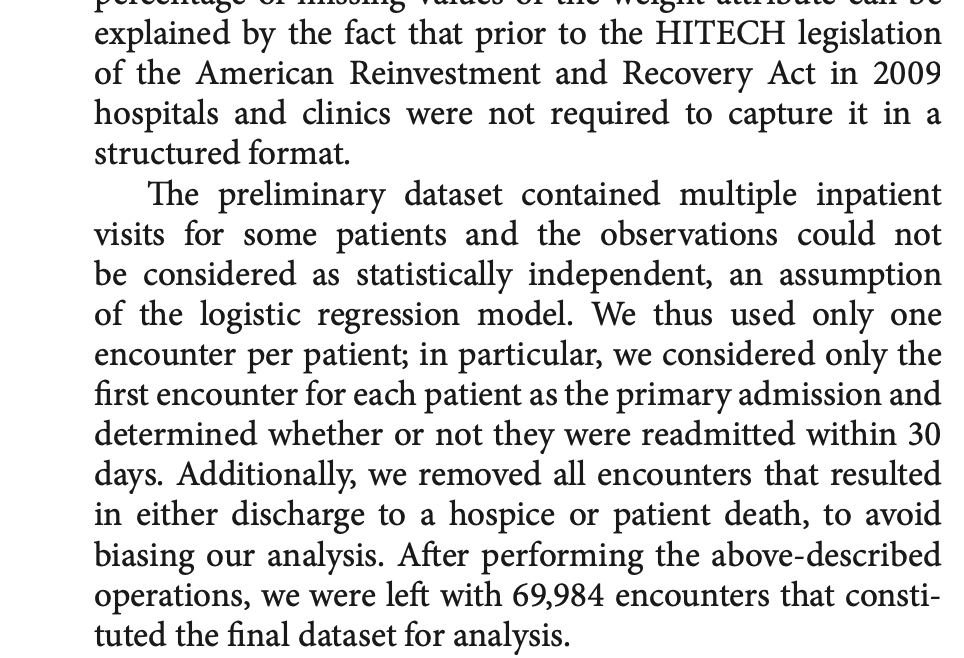

In [68]:
df_replaced["patient_nbr"].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [70]:
df_replaced[df_replaced["patient_nbr"]== 88785891]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_id_x,discharge_disposition_id_y,admission_source_id_z
38307,119039172,88785891,Caucasian,Female,[20-30),?,1,1,7,1,OG,Emergency/Trauma,32,0,10,0,0,0,250.13,244,490,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
40252,125094312,88785891,Caucasian,Female,[20-30),?,1,1,7,1,BC,Emergency/Trauma,10,0,10,1,0,2,250.11,244,?,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30,Emergency,Discharged to home,Emergency Room
40661,126171582,88785891,Caucasian,Female,[20-30),?,1,1,7,5,BC,Emergency/Trauma,35,0,15,1,0,3,250.13,536,V58,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
44515,137245596,88785891,Caucasian,Female,[20-30),?,3,1,7,2,SP,Surgery-General,1,0,8,1,0,5,250.11,465,244,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Elective,Discharged to home,Emergency Room
45147,139425576,88785891,Caucasian,Female,[20-30),?,1,1,7,2,BC,Emergency/Trauma,32,0,4,1,0,6,250.11,V58,V15,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Emergency,Discharged to home,Emergency Room
45986,141994242,88785891,Caucasian,Female,[20-30),?,2,1,7,4,BC,Emergency/Trauma,8,0,14,1,0,7,250.1,276,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Urgent,Discharged to home,Emergency Room
50167,150986298,88785891,Caucasian,Female,[20-30),?,2,1,7,1,BC,Emergency/Trauma,2,0,9,4,1,9,8,250.01,V09,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Urgent,Discharged to home,Emergency Room
50393,151413846,88785891,Caucasian,Female,[20-30),?,1,1,7,4,SP,Emergency/Trauma,64,0,19,4,1,9,250.11,305,V58,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Emergency,Discharged to home,Emergency Room
50773,152188656,88785891,Caucasian,Female,[20-30),?,2,7,7,1,BC,Surgery-General,33,0,10,4,1,10,250.11,244,V15,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Urgent,Left AMA,Emergency Room
51519,153558456,88785891,Caucasian,Female,[20-30),?,2,1,7,1,BC,Emergency/Trauma,35,0,10,3,1,11,250.11,V15,V58,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Urgent,Discharged to home,Emergency Room


In [72]:
df_drop= df_replaced["patient_nbr"].drop_duplicates(keep="first")

In [73]:
df_drop

0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101754    183087545
101755    188574944
101756    140199494
101758    120975314
101765    175429310
Name: patient_nbr, Length: 71518, dtype: int64

In [74]:
df_drop = df_replaced.drop_duplicates(keep="first",subset="patient_nbr")

In [77]:
df_drop.isna().sum()

encounter_id                     0
patient_nbr                      0
race                             0
gender                           0
age                              0
weight                           0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
payer_code                       0
medical_specialty                0
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
diag_1                           0
diag_2                           0
diag_3                           0
number_diagnoses                 0
max_glu_serum                    0
A1Cresult                        0
metformin                        0
repaglinide                      0
nateglinide                      0
chlorpropamide                   0
glimepiride         

In [84]:
df_drop = df_drop.dropna(subset=["admission_type_id_x","discharge_disposition_id_y","admission_source_id_z"])

In [86]:
df_drop.isna().sum()

encounter_id                  0
patient_nbr                   0
race                          0
gender                        0
age                           0
weight                        0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                        0
diag_2                        0
diag_3                        0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburid

In [88]:
df_drop["admission_type_id_x"].value_counts()

Emergency        34732
Elective         13163
Urgent           12511
Not Available     1329
Not Mapped         291
Trauma Center       21
Newborn              9
Name: admission_type_id_x, dtype: int64

In [89]:
df_drop["discharge_disposition_id_y"].value_counts()

Discharged to home                                                                                           40677
Discharged/transferred to SNF                                                                                 7727
Discharged/transferred to home with home health service                                                       7366
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1370
Discharged/transferred to another short term hospital                                                         1337
Expired                                                                                                        962
Discharged/transferred to another type of inpatient care institution                                           798
Discharged/transferred to ICF                                                                                  533
Left AMA                                                                        

In [90]:
df_drop["admission_source_id_z"].value_counts()

 Emergency Room                                               35659
 Physician Referral                                           20765
Transfer from a hospital                                       2192
 Transfer from another health care facility                    1780
Clinic Referral                                                 839
 Transfer from a Skilled Nursing Facility (SNF)                 469
 Not Mapped                                                     155
 Not Available                                                   95
HMO Referral                                                     74
 Court/Law Enforcement                                           11
 Transfer from critial access hospital                            7
 Transfer from hospital inpt/same fac reslt in a sep claim        4
 Extramural Birth                                                 2
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                 

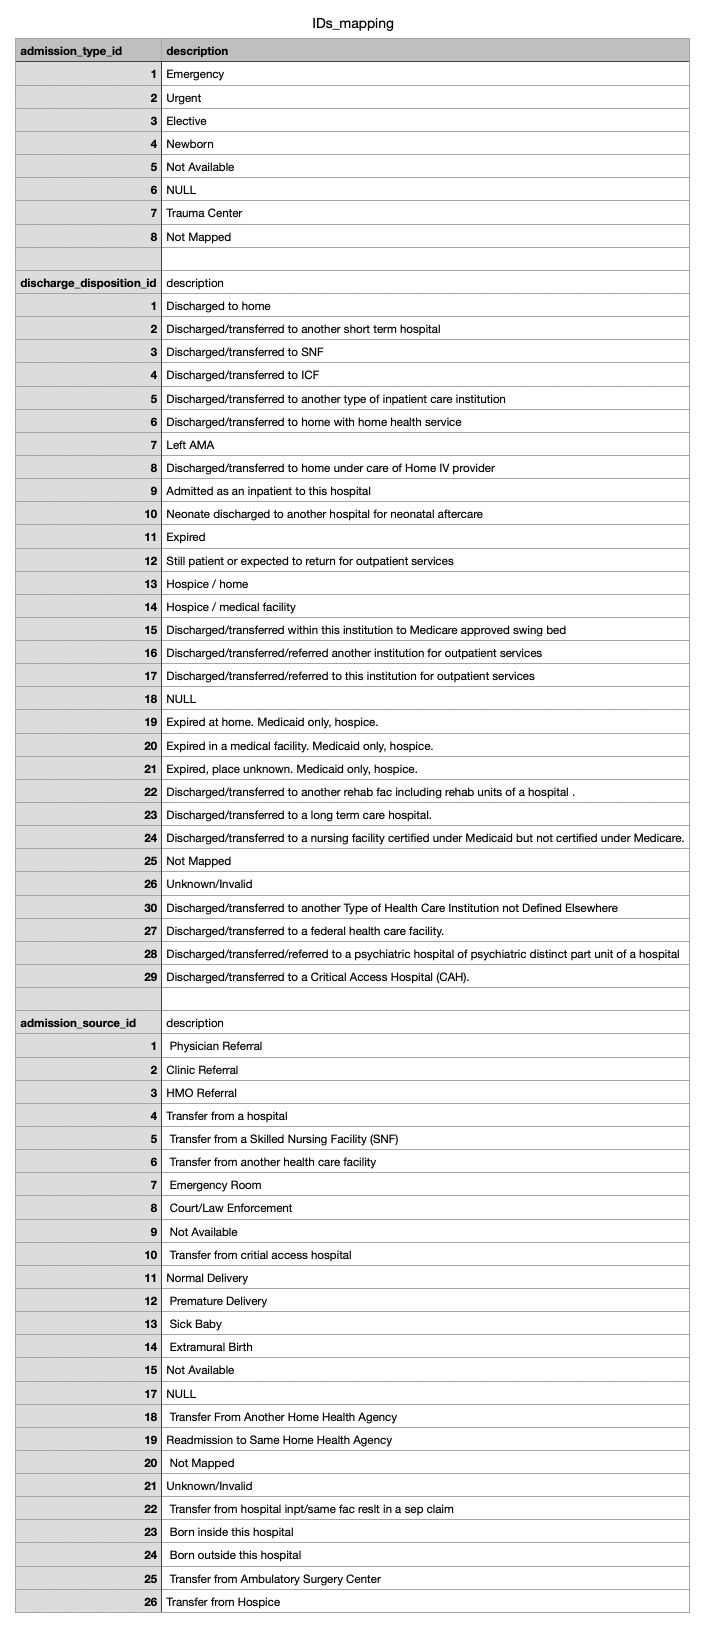

In [11]:
diabetes_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [12]:
diabetes_df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [13]:
diabetes_df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [14]:
diabetes_df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [15]:
diabetes_df['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [16]:
diabetes_df['insulin'].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [17]:
diabetes_df['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64